Sacado de http://balbuceosastropy.blogspot.com.ar/2015/06/spherical-harmonics-in-python.html

In [2]:
%matplotlib inline
#from __future__ import division
import scipy as sci
import scipy.special as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors


Now we will build below several graphical representations of the same spherical harmonic, in order to grasp some idea of its geometry. We'll begin with some usual graphic representations in three dimensions. Since these are complex valued functions, we will represent first the module, and then the real part.

In [3]:
l = 4    #degree
m = 2    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] #arrays of angular variables
R = np.abs(sp.sph_harm(m, l, PHI, THETA)) #Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

We wish to color the surface depending on the value of the radial distance from the origin, that is, of |Yml(θ,ϕ)|. So, the color is going to be defined by the R array, for which an object ScalarMappable with the RGB values will be created following the instructions of this answer in stackoverflow

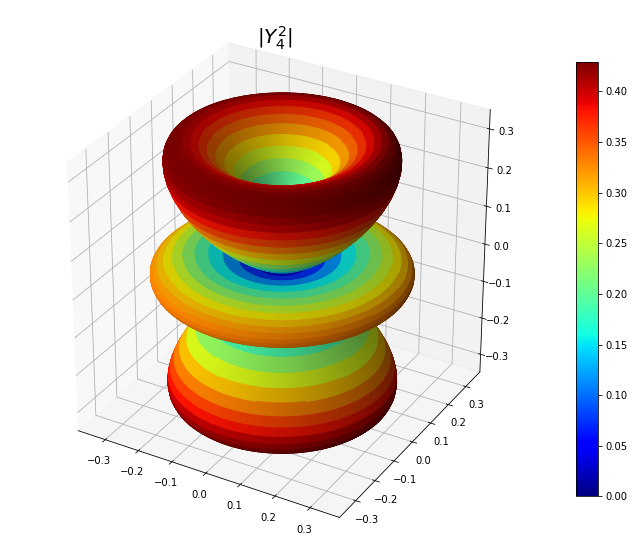

In [4]:
N = R/R.max()    # Normalize R for the plot colors to cover the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(12,10))
im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N))
ax.set_title(r'$|Y^2_ 4|$', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)    # Assign the unnormalized data array to the mappable
                  #so that the scale corresponds to the values of R
fig.colorbar(m, shrink=0.8);

And then we will represent only the real part of Yml

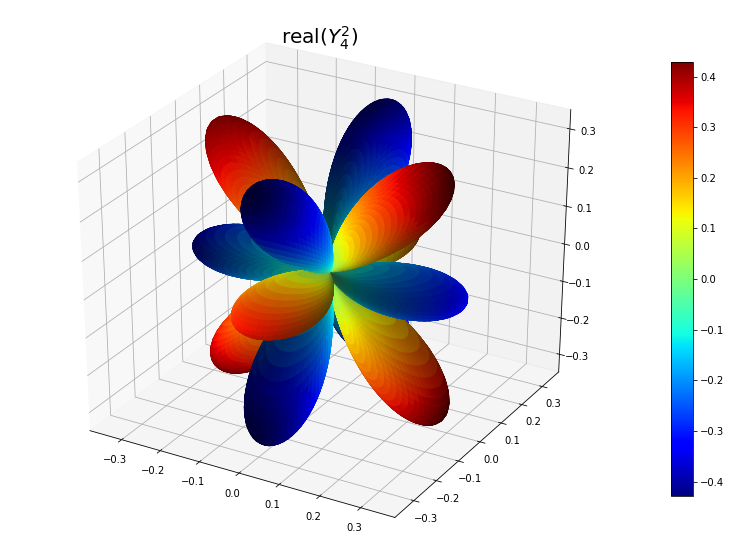

In [5]:
l = 4    # degree
m = 2    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
R = sp.sph_harm(m, l, PHI, THETA).real

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

#As R has negative values, we'll use an instance of Normalize
#see http://stackoverflow.com/questions/25023075/normalizing-colormap-used-by-facecolors-in-matplotlib
norm = colors.Normalize()
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(14,10))
m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(R)))
ax.set_title('real$(Y^2_ 4)$', fontsize=20)
m.set_array(R)
fig.colorbar(m, shrink=0.8);

In the figure above, the negative and positive values of Real(Yml) are shown clearly differentiated, with negative values represented in blues gamut, and positive values in green to red, depending the values on the orientation in space. Nevertheless I prefer to imagine the spherical harmonics as scalar fields (pressure, temperature, etc.) defined on the unit sphere, where they take positive or negative values that can be displayed as peaks or valleys on the surface. The following plot goes in this direction, by just adding the radius of the spherical surface (R=1) to the value of the real part of the spherical harmonic. Otherwise the method of obtaining the graph is the same as before:

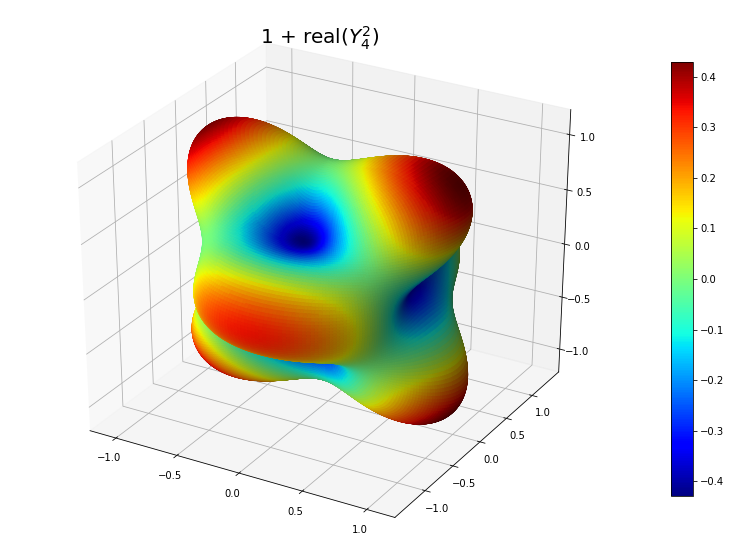

In [6]:
l = 4    # degree
m = 2    # order
PHI, THETA = np.mgrid[0:2*np.pi:300j, 0:np.pi:150j]
R = sp.sph_harm(m, l, PHI, THETA).real

s = 1
X = (s*R+1) * np.sin(THETA) * np.cos(PHI)
Y = (s*R+1) * np.sin(THETA) * np.sin(PHI)
Z = (s*R+1) * np.cos(THETA)

norm = colors.Normalize()
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(14,10))
m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(R)))
ax.set_title('1 + real$(Y^2_ 4)$', fontsize=20)
m.set_array(R)
fig.colorbar(m, shrink=0.8);

In [7]:
# Coordinate arrays for the graphical representation
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi/2, np.pi/2, 50)
X, Y = np.meshgrid(x, y)

# Spherical coordinate arrays derived from x, y
# Necessary conversions to get Mollweide right
phi = x.copy()    # physical copy
phi[x < 0] = 2 * np.pi + x[x<0]
theta = np.pi/2 - y
PHI, THETA = np.meshgrid(phi, theta)

In [8]:
l = 4
m = 2
SH_SP = sp.sph_harm(m, l, PHI, THETA).real    # Plot just the real part

What follows is a representation of the spherical harmonic as a heatmap of a field with a Mollweide projection. The value l−m gives the number of horizontal "bands" or lines of constant latitude where the spherical harmonic is null. The order m is the number of zero circles passing through the poles (beware with the count, in the flat Mollweide projection you'll see only half circles). To check this you can see a very nice interactive 3D visualization here.

In [9]:
#This is to enable bold Latex symbols in the matplotlib titles, according to:
#http://stackoverflow.com/questions/14324477/bold-font-weight-for-latex-axes-label-in-matplotlib
#matplotlib.rc('text', usetex=True)
#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

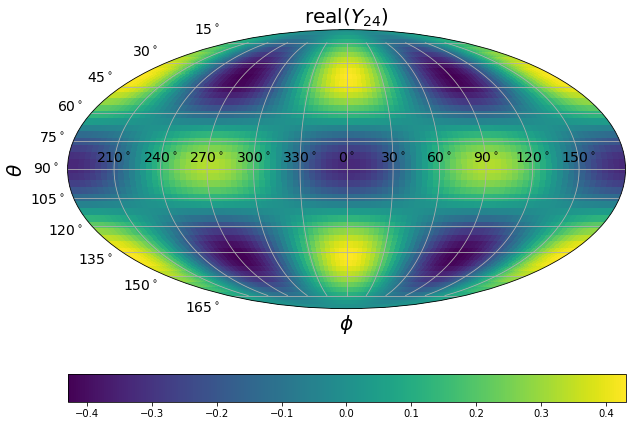

In [9]:
xlabels = ['$210^\circ$', '$240^\circ$','$270^\circ$','$300^\circ$','$330^\circ$',
           '$0^\circ$', '$30^\circ$', '$60^\circ$', '$90^\circ$','$120^\circ$', '$150^\circ$']

ylabels = ['$165^\circ$', '$150^\circ$', '$135^\circ$', '$120^\circ$', 
           '$105^\circ$', '$90^\circ$', '$75^\circ$', '$60^\circ$',
           '$45^\circ$','$30^\circ$','$15^\circ$']

fig, ax = plt.subplots(subplot_kw=dict(projection='mollweide'), figsize=(10,8))
im = ax.pcolormesh(X, Y , SH_SP)
ax.set_xticklabels(xlabels, fontsize=14)
ax.set_yticklabels(ylabels, fontsize=14)
ax.set_title('real$(Y_{24})$', fontsize=20)
ax.set_xlabel(r'$\phi$', fontsize=20)
ax.set_ylabel(r'$\theta$', fontsize=20)
ax.grid()
fig.colorbar(im, orientation='horizontal');